### Living Arrangements Examples from CPS

September 1, 2020

Attempt at replication of [this](https://www.federalreserve.gov/econres/notes/feds-notes/an-early-evaluation-of-the-effects-of-the-pandemic-on-living-arrangements-and-household-formation-20200807.htm). Identifies several problems with bd CPS.

In [1]:
import pandas as pd
comp_data = pd.read_csv('fed_hh_example.csv')

import os
os.chdir('/home/brian/Documents/CPS/data/')

import re, struct
import numpy as np

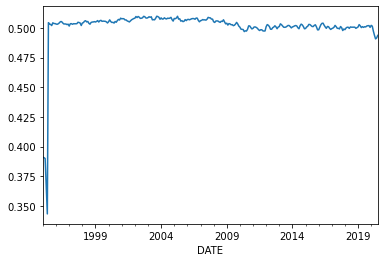

In [6]:
cols = ['QSTNUM', 'AGE', 'YEAR', 'MONTH', 'HHWGT', 'PWSSWGT']

df = pd.concat([pd.read_feather(f'clean/cps{year}.ft', columns=cols)
                  .query('AGE > 15') 
                for year in range(1995, 2021)])

headship_rate = (lambda grp: grp.groupby('QSTNUM').HHWGT.first().sum()
                 / grp.PWSSWGT.sum())
data = (df.groupby(['YEAR', 'MONTH']).apply(headship_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1)
data.plot(legend=None);

<AxesSubplot:xlabel='DATE'>

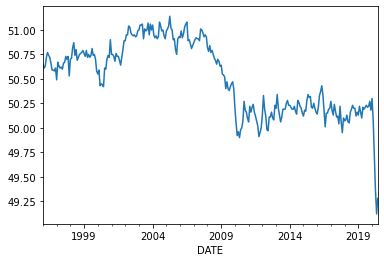

In [3]:
comp_data['DATE'] = pd.to_datetime(comp_data['date'])
comp_data.set_index('DATE')['headship'].plot()

In [20]:
df.query('YEAR == 1995 and MONTH == 2').groupby('QSTNUM').HHWGT.first().sum()

77302568.73637009

In [21]:
df.query('YEAR == 1995 and MONTH == 2').PWSSWGT.sum()

197885570.0

In [30]:
df.query('YEAR == 1995 and MONTH == 2 and HHWGT == PWSSWGT')

,QSTNUM,AGE,YEAR,MONTH,HHWGT,PWSSWGT
1509450,1274,56,1995,2,2368.558838,2368.558838
1509452,2036,54,1995,2,2391.079346,2391.079346
1509454,2463,80,1995,2,2499.969971,2499.969971
1509456,2781,26,1995,2,2281.591309,2281.591309
1509458,8264,38,1995,2,3207.095703,3207.095703
...,...,...,...,...,...,...
1648045,40560,39,1995,2,277.946289,277.946289
1648049,40561,54,1995,2,323.815887,323.815887
1648052,40875,34,1995,2,318.532898,318.532898
1648056,40877,29,1995,2,352.001404,352.001404


In [36]:
df

,QSTNUM,AGE,YEAR,MONTH,HHWGT,PWSSWGT
0,18843,75,1995,6,790.941223,913.165771
1,18843,74,1995,6,790.941223,790.941223
2,18844,80,1995,6,913.165771,913.165771
3,18845,42,1995,6,883.158020,883.158020
4,18845,23,1995,6,883.158020,994.269104
...,...,...,...,...,...,...
726062,46379,65,2020,2,233.897202,246.919693
726063,46379,62,2020,2,233.897202,233.897202
726064,31573,77,2020,2,311.565002,253.177200
726065,31573,70,2020,2,311.565002,311.565002
